In [1]:
from sdmetrics import load_demo
from sdmetrics.reports.single_table import QualityReport
from sdmetrics.single_table import LogisticDetection, SVCDetection
import matplotlib.pyplot as plt
import copy


In [2]:
real_data, synthetic_data, metadata = load_demo(modality='single_table')
real_data.head()

,student_id,gender,second_perc,high_perc,high_spec,degree_perc,degree_type,work_experience,experience_years,employability_perc,mba_spec,mba_perc,salary,placed,start_date,end_date,duration
0,17264,M,67.00,91.00,Commerce,58.00,Sci&Tech,False,0,55.0,Mkt&HR,58.80,27000.0,True,2020-07-23,2020-10-12,3.0
1,17265,M,79.33,78.33,Science,77.48,Sci&Tech,True,1,86.5,Mkt&Fin,66.28,20000.0,True,2020-01-11,2020-04-09,3.0
2,17266,M,65.00,68.00,Arts,64.00,Comm&Mgmt,False,0,75.0,Mkt&Fin,57.80,25000.0,True,2020-01-26,2020-07-13,6.0
3,17267,M,56.00,52.00,Science,52.00,Sci&Tech,False,0,66.0,Mkt&HR,59.43,NaN,False,NaT,NaT,NaN
4,17268,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,False,0,96.8,Mkt&Fin,55.50,42500.0,True,2020-07-04,2020-09-27,3.0


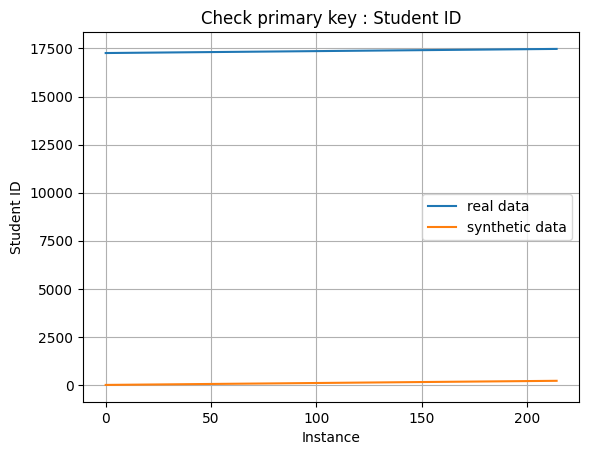

In [32]:
fig,ax = plt.subplots()
ax.plot(real_data['student_id'],label='real data')
ax.plot(synthetic_data['student_id'],label='synthetic data')
ax.grid(True)
ax.set_title('Check primary key : Student ID')
ax.set_xlabel('Instance')
ax.set_ylabel('Student ID')
ax.legend()

## Detection metric with metadata

In [16]:
LogisticDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

0.0

In [18]:
SVCDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

0.0018257694314032236

## Detection metric without metadata

In [25]:
LogisticDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data)

0.0

In [20]:
SVCDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data)

0.00038942502753125385

In [44]:
print(metadata)

{'fields': {'start_date': {'type': 'datetime', 'format': '%Y-%m-%d'}, 'end_date': {'type': 'datetime', 'format': '%Y-%m-%d'}, 'salary': {'type': 'numerical', 'subtype': 'integer'}, 'duration': {'type': 'categorical'}, 'student_id': {'type': 'id', 'subtype': 'integer'}, 'high_perc': {'type': 'numerical', 'subtype': 'float'}, 'high_spec': {'type': 'categorical'}, 'mba_spec': {'type': 'categorical'}, 'second_perc': {'type': 'numerical', 'subtype': 'float'}, 'gender': {'type': 'categorical'}, 'degree_perc': {'type': 'numerical', 'subtype': 'float'}, 'placed': {'type': 'boolean'}, 'experience_years': {'type': 'numerical', 'subtype': 'float'}, 'employability_perc': {'type': 'numerical', 'subtype': 'float'}, 'mba_perc': {'type': 'numerical', 'subtype': 'float'}, 'work_experience': {'type': 'boolean'}, 'degree_type': {'type': 'categorical'}}, 'constraints': [], 'model_kwargs': {}, 'name': None, 'primary_key': 'student_id', 'sequence_index': None, 'entity_columns': [], 'context_columns': []}


## First suggested solution : Drop primary key

In [45]:
real_data_2 = copy.deepcopy(real_data)
real_data_2.drop(['student_id'],axis=1,inplace=True)

synthetic_data_2 = copy.deepcopy(synthetic_data)
synthetic_data_2.drop(['student_id'],axis=1,inplace=True)

metadata_2 = copy.deepcopy(metadata)
del metadata_2['fields']['student_id']

In [41]:
print(LogisticDetection.compute(
    real_data=real_data_2,
    synthetic_data=synthetic_data_2))

print(SVCDetection.compute(
    real_data=real_data_2,
    synthetic_data=synthetic_data_2))

0.2815597287428274
0.14286645800730302


In [51]:
print(LogisticDetection.compute(
    real_data=real_data_2,
    synthetic_data=synthetic_data_2,metadata=metadata_2))

print(SVCDetection.compute(
    real_data=real_data_2,
    synthetic_data=synthetic_data_2,metadata=metadata_2))

0.2789623543731524
0.16280864197530853


## After changing the code

In [3]:
LogisticDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata)

{'fields': {'start_date': {'type': 'datetime', 'format': '%Y-%m-%d'}, 'end_date': {'type': 'datetime', 'format': '%Y-%m-%d'}, 'salary': {'type': 'numerical', 'subtype': 'integer'}, 'duration': {'type': 'categorical'}, 'student_id': {'type': 'id', 'subtype': 'integer'}, 'high_perc': {'type': 'numerical', 'subtype': 'float'}, 'high_spec': {'type': 'categorical'}, 'mba_spec': {'type': 'categorical'}, 'second_perc': {'type': 'numerical', 'subtype': 'float'}, 'gender': {'type': 'categorical'}, 'degree_perc': {'type': 'numerical', 'subtype': 'float'}, 'placed': {'type': 'boolean'}, 'experience_years': {'type': 'numerical', 'subtype': 'float'}, 'employability_perc': {'type': 'numerical', 'subtype': 'float'}, 'mba_perc': {'type': 'numerical', 'subtype': 'float'}, 'work_experience': {'type': 'boolean'}, 'degree_type': {'type': 'categorical'}}, 'constraints': [], 'model_kwargs': {}, 'name': None, 'primary_key': 'student_id', 'sequence_index': None, 'entity_columns': [], 'context_columns': []}
LA

0.2651096910682199

In [4]:
LogisticDetection.compute(
    real_data=real_data,
    synthetic_data=synthetic_data)

{'fields': {'student_id': {'type': 'numerical', 'subtype': 'integer'}, 'gender': {'type': 'categorical'}, 'second_perc': {'type': 'numerical', 'subtype': 'float'}, 'high_perc': {'type': 'numerical', 'subtype': 'float'}, 'high_spec': {'type': 'categorical'}, 'degree_perc': {'type': 'numerical', 'subtype': 'float'}, 'degree_type': {'type': 'categorical'}, 'work_experience': {'type': 'boolean'}, 'experience_years': {'type': 'numerical', 'subtype': 'integer'}, 'employability_perc': {'type': 'numerical', 'subtype': 'float'}, 'mba_spec': {'type': 'categorical'}, 'mba_perc': {'type': 'numerical', 'subtype': 'float'}, 'salary': {'type': 'numerical', 'subtype': 'float'}, 'placed': {'type': 'boolean'}, 'start_date': {'type': 'datetime'}, 'end_date': {'type': 'datetime'}, 'duration': {'type': 'categorical'}}}
BB


0.0